<a href="https://colab.research.google.com/github/Vatsal1710/bank_nifty_linear_reg/blob/main/bank_nifty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("banknifty_data.csv")
df

,Unnamed: 0,time,open,high,low,close,weekday,range_HL,range_OC,type
0,0,2000-01-03 09:15:00+05:30,1054.8101,1054.8101,1054.8101,1054.8101,0,0.000,0.000,Tie
1,1,2000-01-04 09:15:00+05:30,1092.0800,1092.0800,1092.0800,1092.0800,1,0.000,0.000,Tie
2,2,2000-01-05 09:15:00+05:30,1055.9900,1055.9900,1055.9900,1055.9900,2,0.000,0.000,Tie
3,3,2000-01-06 09:15:00+05:30,1086.6700,1086.6700,1086.6700,1086.6700,3,0.000,0.000,Tie
4,4,2000-01-07 09:15:00+05:30,1126.9900,1126.9900,1126.9900,1126.9900,4,0.000,0.000,Tie
...,...,...,...,...,...,...,...,...,...,...
5564,5564,2022-06-13 09:15:00+05:30,33728.6480,33774.0510,33210.3520,33405.8520,0,563.699,322.796,bear
5565,5565,2022-06-14 09:15:00+05:30,33180.6020,33618.1480,33123.8980,33311.3520,1,494.250,130.750,bull
5566,5566,2022-06-15 09:15:00+05:30,33317.8010,33554.5510,33249.5510,33339.0000,2,305.000,21.199,bull
5567,5567,2022-06-16 09:15:00+05:30,33648.8010,33756.5000,32537.9490,32617.1000,3,1218.551,1031.701,bear


In [ ]:
df.shape

(5569, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5569 entries, 0 to 5568
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  5569 non-null   int64  
 1   time        5569 non-null   object 
 2   open        5569 non-null   float64
 3   high        5569 non-null   float64
 4   low         5569 non-null   float64
 5   close       5569 non-null   float64
 6   weekday     5569 non-null   int64  
 7   range_HL    5569 non-null   float64
 8   range_OC    5569 non-null   float64
 9   type        5569 non-null   object 
dtypes: float64(6), int64(2), object(2)
memory usage: 435.2+ KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,5569.0,2784.000000,1607.776156,0.00000,1392.0000,2784.0000,4176.0000,5568.000
open,5569.0,12631.966523,10536.003150,743.70001,3700.8000,10003.5000,19201.1000,41234.551
high,5569.0,12736.926186,10611.487337,743.70001,3747.7500,10109.6500,19376.8500,41829.602
low,5569.0,12509.049312,10441.152216,743.70001,3659.3999,9891.9004,19002.4490,40829.148
close,5569.0,12623.553634,10526.993520,743.70001,3702.0500,9998.8496,19168.0510,41238.301
weekday,5569.0,1.994613,1.413060,0.00000,1.0000,2.0000,3.0000,6.000
range_HL,5569.0,227.876874,253.204788,0.00000,48.3501,174.4000,308.5000,4319.051
range_OC,5569.0,120.307194,170.791001,0.00000,1.5990,64.5510,166.1006,2445.699


In [ ]:
df["time"].value_counts()

2000-01-03 09:15:00+05:30    1
2014-12-15 09:15:00+05:30    1
2014-12-26 09:15:00+05:30    1
2014-12-24 09:15:00+05:30    1
2014-12-23 09:15:00+05:30    1
                            ..
2007-06-11 09:15:00+05:30    1
2007-06-08 09:15:00+05:30    1
2007-06-07 09:15:00+05:30    1
2007-06-06 09:15:00+05:30    1
2022-06-17 09:15:00+05:30    1
Name: time, Length: 5569, dtype: int64

In [ ]:
a=[]
for i in df["time"]:
    l=i[0:10]
    a.append(l)
df["time"]=pd.Series(a)   

In [ ]:
df.drop(['Unnamed: 0'],inplace=True,axis= 1)
df

,time,open,high,low,close,weekday,range_HL,range_OC,type
0,2000-01-03,1054.8101,1054.8101,1054.8101,1054.8101,0,0.000,0.000,Tie
1,2000-01-04,1092.0800,1092.0800,1092.0800,1092.0800,1,0.000,0.000,Tie
2,2000-01-05,1055.9900,1055.9900,1055.9900,1055.9900,2,0.000,0.000,Tie
3,2000-01-06,1086.6700,1086.6700,1086.6700,1086.6700,3,0.000,0.000,Tie
4,2000-01-07,1126.9900,1126.9900,1126.9900,1126.9900,4,0.000,0.000,Tie
...,...,...,...,...,...,...,...,...,...
5564,2022-06-13,33728.6480,33774.0510,33210.3520,33405.8520,0,563.699,322.796,bear
5565,2022-06-14,33180.6020,33618.1480,33123.8980,33311.3520,1,494.250,130.750,bull
5566,2022-06-15,33317.8010,33554.5510,33249.5510,33339.0000,2,305.000,21.199,bull
5567,2022-06-16,33648.8010,33756.5000,32537.9490,32617.1000,3,1218.551,1031.701,bear


In [ ]:
y1=[]
m1=[]
d1=[]
for a in df["time"]:
    y=a[0:4]
    m=a[5:7]
    d=a[9:]
    y1.append(y)
    m1.append(m)
    d1.append(d)
df['Year']=pd.Series(y1)
df['Month']=pd.Series(m1)  
df['Day']=pd.Series(d1)  


In [ ]:
df

,time,open,high,low,close,weekday,range_HL,range_OC,type,Year,Month,Day
0,2000-01-03,1054.8101,1054.8101,1054.8101,1054.8101,0,0.000,0.000,Tie,2000,01,3
1,2000-01-04,1092.0800,1092.0800,1092.0800,1092.0800,1,0.000,0.000,Tie,2000,01,4
2,2000-01-05,1055.9900,1055.9900,1055.9900,1055.9900,2,0.000,0.000,Tie,2000,01,5
3,2000-01-06,1086.6700,1086.6700,1086.6700,1086.6700,3,0.000,0.000,Tie,2000,01,6
4,2000-01-07,1126.9900,1126.9900,1126.9900,1126.9900,4,0.000,0.000,Tie,2000,01,7
...,...,...,...,...,...,...,...,...,...,...,...,...
5564,2022-06-13,33728.6480,33774.0510,33210.3520,33405.8520,0,563.699,322.796,bear,2022,06,3
5565,2022-06-14,33180.6020,33618.1480,33123.8980,33311.3520,1,494.250,130.750,bull,2022,06,4
5566,2022-06-15,33317.8010,33554.5510,33249.5510,33339.0000,2,305.000,21.199,bull,2022,06,5
5567,2022-06-16,33648.8010,33756.5000,32537.9490,32617.1000,3,1218.551,1031.701,bear,2022,06,6


In [ ]:
df['time'] = pd.to_datetime(df["time"])

In [ ]:
df.dtypes

time        datetime64[ns]
open               float64
high               float64
low                float64
close              float64
weekday              int64
range_HL           float64
range_OC           float64
type                object
Year                object
Month               object
Day                 object
dtype: object

In [ ]:
df[["Year","Month","Day"]] = df[["Year","Month","Day"]].astype(int)

In [ ]:
df.dtypes

time        datetime64[ns]
open               float64
high               float64
low                float64
close              float64
weekday              int64
range_HL           float64
range_OC           float64
type                object
Year                 int32
Month                int32
Day                  int32
dtype: object

In [ ]:
df.drop(["time"],inplace=True,axis=1)

In [ ]:
df

,open,high,low,close,weekday,range_HL,range_OC,type,Year,Month,Day
0,1054.8101,1054.8101,1054.8101,1054.8101,0,0.000,0.000,Tie,2000,1,3
1,1092.0800,1092.0800,1092.0800,1092.0800,1,0.000,0.000,Tie,2000,1,4
2,1055.9900,1055.9900,1055.9900,1055.9900,2,0.000,0.000,Tie,2000,1,5
3,1086.6700,1086.6700,1086.6700,1086.6700,3,0.000,0.000,Tie,2000,1,6
4,1126.9900,1126.9900,1126.9900,1126.9900,4,0.000,0.000,Tie,2000,1,7
...,...,...,...,...,...,...,...,...,...,...,...
5564,33728.6480,33774.0510,33210.3520,33405.8520,0,563.699,322.796,bear,2022,6,3
5565,33180.6020,33618.1480,33123.8980,33311.3520,1,494.250,130.750,bull,2022,6,4
5566,33317.8010,33554.5510,33249.5510,33339.0000,2,305.000,21.199,bull,2022,6,5
5567,33648.8010,33756.5000,32537.9490,32617.1000,3,1218.551,1031.701,bear,2022,6,6


In [ ]:
df.isnull().sum()

open        0
high        0
low         0
close       0
weekday     0
range_HL    0
range_OC    0
type        0
Year        0
Month       0
Day         0
dtype: int64

<AxesSubplot:>

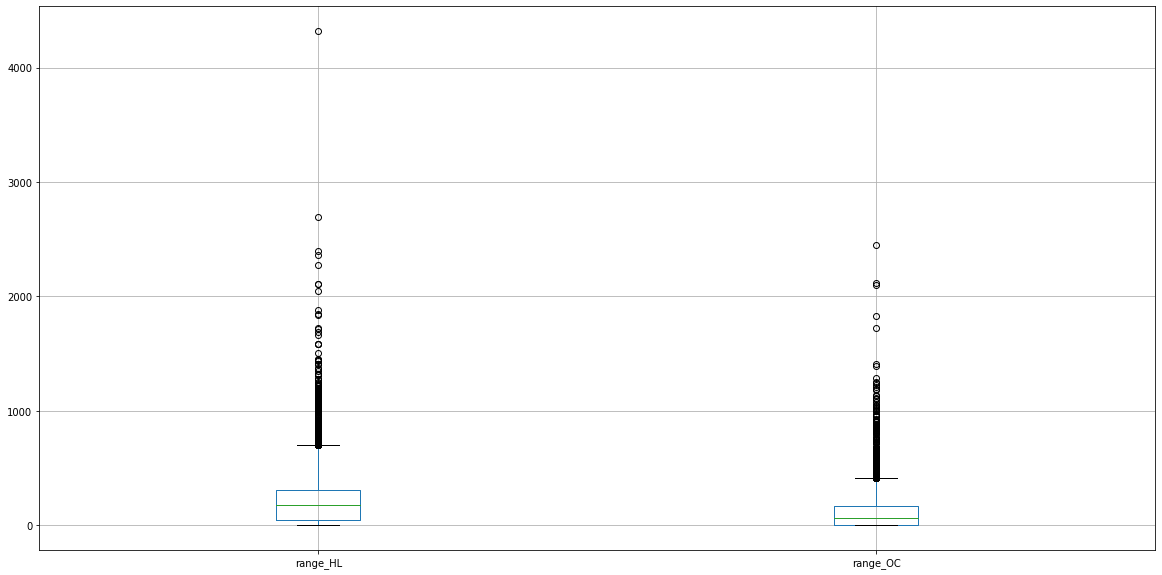

In [ ]:
plt.rcParams["figure.figsize"] = [20,10] 
df.boxplot(column = ['range_HL','range_OC'])

<AxesSubplot:>

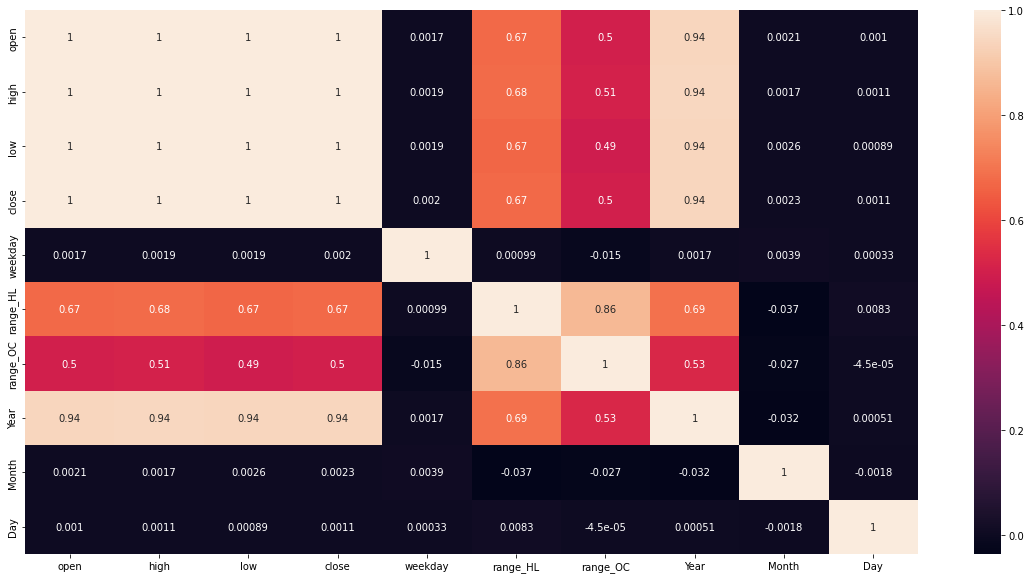

In [ ]:
sns.heatmap(df.corr(),annot = True)